# HW 2: Machile Learning Pipeline 
#### James Jensen 



In [13]:
%load_ext autoreload
%autoreload 2

In [14]:
import explore
import pipeline
import tree

### Read/Load Data 
In the following cell, I call the load_data() function from pipeline.py, which takes the path of a csv file and returns a pandas dataframe.

In [6]:
filename = 'credit-data.csv'
df = pipeline.load_data(filename)

### Explore Data 
In the following cells, I make use of functions from explore.py to provide me with a better understanding of the underlying data before I conduct any analysis. I provide visualizations of the distributions of several variables, a heatmap demonstrating correlations among the variables, key outliers, data summaries, and insight into missing data -- if it appears to be missing at random, or if there is a pattern as to why it's missing. 

My columns are interested are labeled: COL_NAMES = ['NumberOfTimes90DaysLate', 'DebtRatio', 'age']

As the heatmap demonstrates, there appear to be strong correlations between age and the number of real estate loans and between number of real estate loans and number of open credit lines. As for our target variable, SeriousDlqin2yrs is most strongly correlated with NumberofTime90DaysLate, NumberofTimes20-59DayPastDue, and NumberofTimes60-89DayPastDue. 

When looking for outliers, the summary statistics of the DebtRatio stand out the most -- DebtRatio has a mean of 331 and a median of .36, as well the 75th percentile equivalent to .86.

When looking into the deliquency rate per zipcode, one zipcode stood out: 60644. With over 2500 records from zipcode 60644 in the dataset, none of them had a value of 1 for deliquency. 

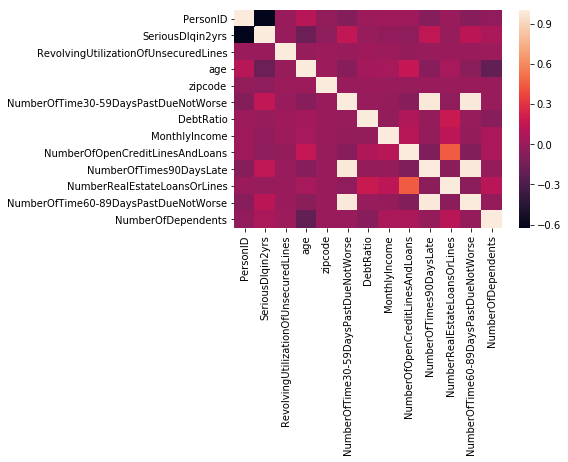

In [8]:
explore.make_heatmap(df)

In [10]:
COL_NAMES = ['NumberOfTimes90DaysLate', 'DebtRatio', 'age']
explore.summarize(df, COL_NAMES)

count    41016.000000
mean         0.419592
std          5.190382
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         98.000000
Name: NumberOfTimes90DaysLate, dtype: float64
count     41016.000000
mean        331.458137
std        1296.109695
min           0.000000
25%           0.176375
50%           0.369736
75%           0.866471
max      106885.000000
Name: DebtRatio, dtype: float64
count    41016.000000
mean        51.683489
std         14.746880
min         21.000000
25%         41.000000
50%         51.000000
75%         62.000000
max        109.000000
Name: age, dtype: float64


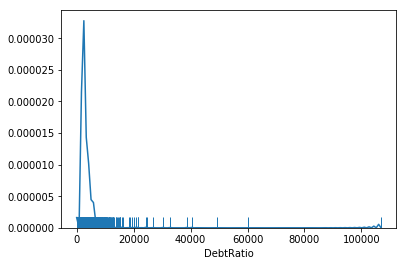

In [18]:
explore.plot_distribution(df['DebtRatio'])

In [20]:
LOC = 'zipcode'
TARGET = 'SeriousDlqin2yrs'
explore.target_loc_dist(df, TARGET, LOC)
## The percentage of individuals who fell deliquent on loans over the entire population per zipcode.  

zipcode
60601    0.169753
60618    0.176406
60625    0.169560
60629    0.166744
60637    0.180516
60644         NaN
dtype: float64

#### Missing Records

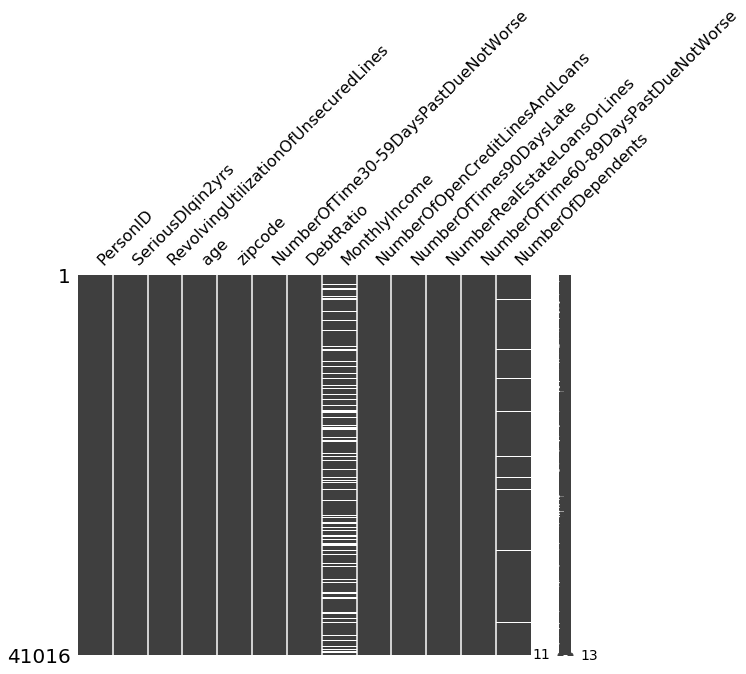

In [22]:
# Displays missing records per column by index. Variation in both Number of Independents and Monthly Income appear to be random. 
explore.missing_matrix(df)

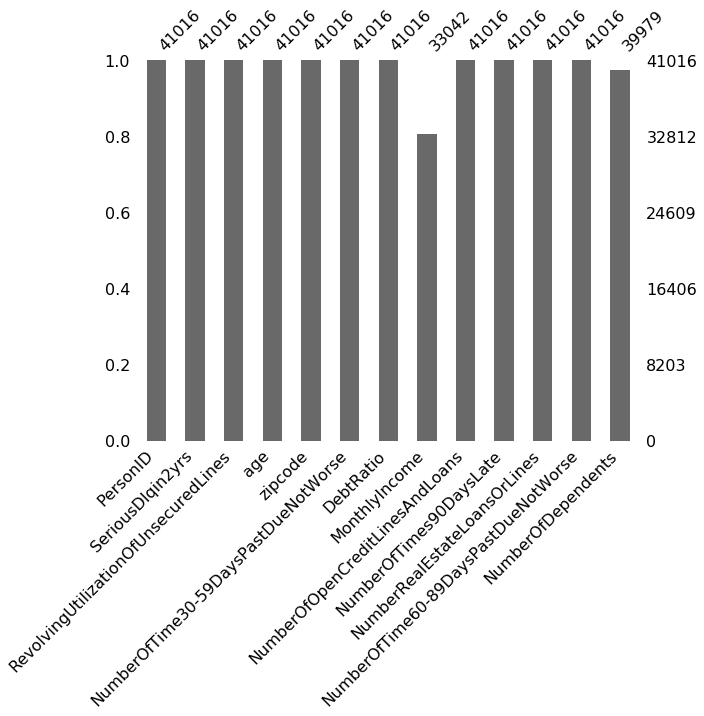

In [24]:
#Displays number of expected rows and number of actual for each column.
explore.missing_bar(df)

### Pre-Process Data 
At this stage, I called the fill_null() function in pipeline.py to fill missing values with the median value from the respective column.

In [25]:
pipeline.fill_null(df)

### Generate Features/Predictors

